## 4. Building CovnNet using Keras tensorflow

A simple keras image classification workflow in python can be adapted from this github: https://github.com/anujshah1003/own_data_cnn_implementation_keras

### 4.1 Defining the ConvNet model architecture
 
Model architecture = Convolution > relu > Convolution > relu > Max pool (with drop out) > Convolution > relu > convolution > relu > Max pool (drop out) > fully connected with activation > drop out > softmax activation.  

Model is optimised using Adam (adaptive moment estimation):

- Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
- Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
- Adam is relatively easy to configure where the default configuration parameters do well on most problems.


In [9]:
import pandas as pd
import numpy as np
# import os, cv2

from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [10]:
from keras import backend as K
K.set_image_dim_ordering('tf')

import h5py

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing import image

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [11]:
with open('X_train', 'rb') as file:
    X_train = pickle.load(file)
    
with open('y_train', 'rb') as file:
    y_train = pickle.load(file)
    
# with open('X_goog', 'rb') as file:
#     X_test = pickle.load(file)
    
# with open('y_goog', 'rb') as file:
#     y_test = pickle.load(file)

In [12]:
# Train-val split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

In [13]:
Y_train = np_utils.to_categorical(y_train, num_classes=17)
del y_train

In [14]:
Y_test = np_utils.to_categorical(y_test, num_classes=17)
del y_test

In [7]:
# Defining the model
input_shape= (128,128,3)
num_classes = 17
model = Sequential()

model.add(Convolution2D(32, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(64, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`
  
/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`
  del sys.path[0]


In [8]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        18496     
__________

True

### 4.2 Callbacks
The use of callbacks in keras allows you to monitor a metric and save the weights of model while training is in progress.

In [10]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

# early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,checkpoint]

## 5. ConvNet Training
Training set is trained over 500 epochs, with a batch size of 128.

In [11]:
# Training

num_epoch = 500
hist = model.fit(X_train, Y_train, batch_size=128,
                 epochs=num_epoch, 
                 validation_data=(X_test, Y_test),
                 callbacks=callbacks_list)

Train on 5770 samples, validate on 2473 samples
Epoch 1/500
5760/5770 [============================>.] - ETA: 0s - loss: 2.8559 - acc: 0.0910
Epoch 00001: val_loss improved from inf to 2.30358, saving model to Best-weights-my_model-001-2.8556-0.0912.hdf5
5770/5770 [==============================] - 24s 4ms/step - loss: 2.8556 - acc: 0.0912 - val_loss: 2.3036 - val_acc: 0.2345
Epoch 2/500
5760/5770 [============================>.] - ETA: 0s - loss: 2.0997 - acc: 0.2931
Epoch 00002: val_loss improved from 2.30358 to 1.46510, saving model to Best-weights-my_model-002-2.0991-0.2934.hdf5
5770/5770 [==============================] - 20s 4ms/step - loss: 2.0991 - acc: 0.2934 - val_loss: 1.4651 - val_acc: 0.5564
Epoch 3/500
5760/5770 [============================>.] - ETA: 0s - loss: 1.5980 - acc: 0.4665
Epoch 00003: val_loss improved from 1.46510 to 1.14142, saving model to Best-weights-my_model-003-1.5977-0.4667.hdf5
5770/5770 [==============================] - 20s 4ms/step - loss: 1.5977 - 

Epoch 28/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.2546 - acc: 0.9003
Epoch 00028: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.2550 - acc: 0.9002 - val_loss: 0.1594 - val_acc: 0.9466
Epoch 29/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.2450 - acc: 0.9097
Epoch 00029: val_loss improved from 0.14432 to 0.13878, saving model to Best-weights-my_model-029-0.2451-0.9097.hdf5
5770/5770 [==============================] - 20s 4ms/step - loss: 0.2451 - acc: 0.9097 - val_loss: 0.1388 - val_acc: 0.9515
Epoch 30/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.2169 - acc: 0.9196
Epoch 00030: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.2166 - acc: 0.9198 - val_loss: 0.1509 - val_acc: 0.9474
Epoch 31/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.2095 - acc: 0.9187
Epoch 00031: val_loss did not improve
5770/5770 [======

Epoch 59/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.1467 - acc: 0.9436
Epoch 00059: val_loss improved from 0.12586 to 0.11840, saving model to Best-weights-my_model-059-0.1464-0.9437.hdf5
5770/5770 [==============================] - 20s 4ms/step - loss: 0.1464 - acc: 0.9437 - val_loss: 0.1184 - val_acc: 0.9656
Epoch 60/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.1350 - acc: 0.9472
Epoch 00060: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.1349 - acc: 0.9471 - val_loss: 0.1480 - val_acc: 0.9624
Epoch 61/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.1529 - acc: 0.9441
Epoch 00061: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.1528 - acc: 0.9442 - val_loss: 0.1644 - val_acc: 0.9519
Epoch 62/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.1336 - acc: 0.9479
Epoch 00062: val_loss did not improve
5770/5770 [======

Epoch 122/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9710
Epoch 00122: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0821 - acc: 0.9711 - val_loss: 0.1486 - val_acc: 0.9677
Epoch 123/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0798 - acc: 0.9696
Epoch 00123: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0797 - acc: 0.9697 - val_loss: 0.1243 - val_acc: 0.9729
Epoch 124/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0728 - acc: 0.9726
Epoch 00124: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0727 - acc: 0.9726 - val_loss: 0.1253 - val_acc: 0.9729
Epoch 125/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0713 - acc: 0.9736
Epoch 00125: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0713 - acc: 0.9737 - val

Epoch 185/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9766
Epoch 00185: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0650 - acc: 0.9766 - val_loss: 0.2798 - val_acc: 0.9450
Epoch 186/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9707
Epoch 00186: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0780 - acc: 0.9704 - val_loss: 0.1320 - val_acc: 0.9685
Epoch 187/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0590 - acc: 0.9778
Epoch 00187: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0589 - acc: 0.9778 - val_loss: 0.1306 - val_acc: 0.9721
Epoch 188/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.9788
Epoch 00188: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0601 - acc: 0.9789 - val

Epoch 216/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0511 - acc: 0.9819
Epoch 00216: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0510 - acc: 0.9820 - val_loss: 0.1124 - val_acc: 0.9761
Epoch 217/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0544 - acc: 0.9802
Epoch 00217: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0545 - acc: 0.9801 - val_loss: 0.1060 - val_acc: 0.9790
Epoch 218/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0546 - acc: 0.9811
Epoch 00218: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0545 - acc: 0.9811 - val_loss: 0.0997 - val_acc: 0.9794
Epoch 219/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0547 - acc: 0.9774
Epoch 00219: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0546 - acc: 0.9775 - val

Epoch 248/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9826
Epoch 00248: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0535 - acc: 0.9827 - val_loss: 0.1111 - val_acc: 0.9725
Epoch 249/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0531 - acc: 0.9793
Epoch 00249: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0539 - acc: 0.9790 - val_loss: 0.1159 - val_acc: 0.9761
Epoch 250/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9861
Epoch 00250: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0440 - acc: 0.9860 - val_loss: 0.1112 - val_acc: 0.9765
Epoch 251/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9839
Epoch 00251: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0489 - acc: 0.9839 - val

Epoch 280/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9823
Epoch 00280: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0470 - acc: 0.9823 - val_loss: 0.1455 - val_acc: 0.9701
Epoch 281/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9858
Epoch 00281: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0441 - acc: 0.9858 - val_loss: 0.1106 - val_acc: 0.9765
Epoch 282/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9845
Epoch 00282: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0385 - acc: 0.9846 - val_loss: 0.1183 - val_acc: 0.9770
Epoch 283/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9884
Epoch 00283: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0341 - acc: 0.9884 - val

Epoch 312/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0362 - acc: 0.9844
Epoch 00312: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0363 - acc: 0.9842 - val_loss: 0.1102 - val_acc: 0.9778
Epoch 313/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0501 - acc: 0.9844
Epoch 00313: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.1127 - val_acc: 0.9770
Epoch 314/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0358 - acc: 0.9875
Epoch 00314: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0357 - acc: 0.9875 - val_loss: 0.1101 - val_acc: 0.9729
Epoch 315/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0299 - acc: 0.9884
Epoch 00315: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0299 - acc: 0.9884 - val

Epoch 344/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0338 - acc: 0.9870
Epoch 00344: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0338 - acc: 0.9870 - val_loss: 0.1271 - val_acc: 0.9737
Epoch 345/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0379 - acc: 0.9852
Epoch 00345: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0378 - acc: 0.9853 - val_loss: 0.1357 - val_acc: 0.9753
Epoch 346/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0382 - acc: 0.9866
Epoch 00346: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0391 - acc: 0.9865 - val_loss: 0.1472 - val_acc: 0.9774
Epoch 347/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0309 - acc: 0.9885
Epoch 00347: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0308 - acc: 0.9886 - val

Epoch 376/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.1069 - acc: 0.9661
Epoch 00376: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.1067 - acc: 0.9662 - val_loss: 0.2749 - val_acc: 0.9519
Epoch 377/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9804
Epoch 00377: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0575 - acc: 0.9802 - val_loss: 0.1261 - val_acc: 0.9705
Epoch 378/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0426 - acc: 0.9840
Epoch 00378: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0425 - acc: 0.9841 - val_loss: 0.1158 - val_acc: 0.9717
Epoch 379/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0377 - acc: 0.9865
Epoch 00379: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0377 - acc: 0.9865 - val

Epoch 408/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0272 - acc: 0.9910
Epoch 00408: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0272 - acc: 0.9910 - val_loss: 0.1063 - val_acc: 0.9774
Epoch 409/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0373 - acc: 0.9868
Epoch 00409: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0372 - acc: 0.9868 - val_loss: 0.1036 - val_acc: 0.9814
Epoch 410/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0299 - acc: 0.9917
Epoch 00410: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0298 - acc: 0.9917 - val_loss: 0.1634 - val_acc: 0.9749
Epoch 411/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0304 - acc: 0.9898
Epoch 00411: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0305 - acc: 0.9896 - val

Epoch 440/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9892
Epoch 00440: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0327 - acc: 0.9893 - val_loss: 0.1038 - val_acc: 0.9802
Epoch 441/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0303 - acc: 0.9885
Epoch 00441: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0303 - acc: 0.9886 - val_loss: 0.1194 - val_acc: 0.9782
Epoch 442/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0287 - acc: 0.9903
Epoch 00442: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0287 - acc: 0.9903 - val_loss: 0.1447 - val_acc: 0.9765
Epoch 443/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0238 - acc: 0.9911
Epoch 00443: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0238 - acc: 0.9912 - val

Epoch 472/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9901
Epoch 00472: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0250 - acc: 0.9901 - val_loss: 0.1171 - val_acc: 0.9798
Epoch 473/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9898
Epoch 00473: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0266 - acc: 0.9898 - val_loss: 0.1256 - val_acc: 0.9790
Epoch 474/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0224 - acc: 0.9924
Epoch 00474: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0224 - acc: 0.9924 - val_loss: 0.1159 - val_acc: 0.9814
Epoch 475/500
5760/5770 [============================>.] - ETA: 0s - loss: 0.0188 - acc: 0.9932
Epoch 00475: val_loss did not improve
5770/5770 [==============================] - 20s 4ms/step - loss: 0.0188 - acc: 0.9932 - val

### 5.1 Loss and accuracy visualisation

The loss and accuracy of our model is visualised using pyplot.

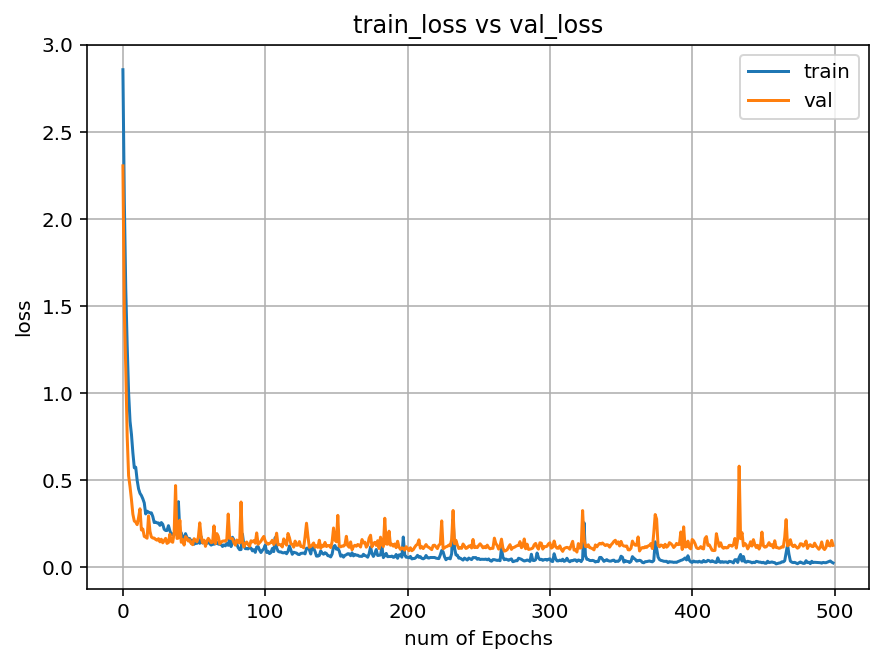

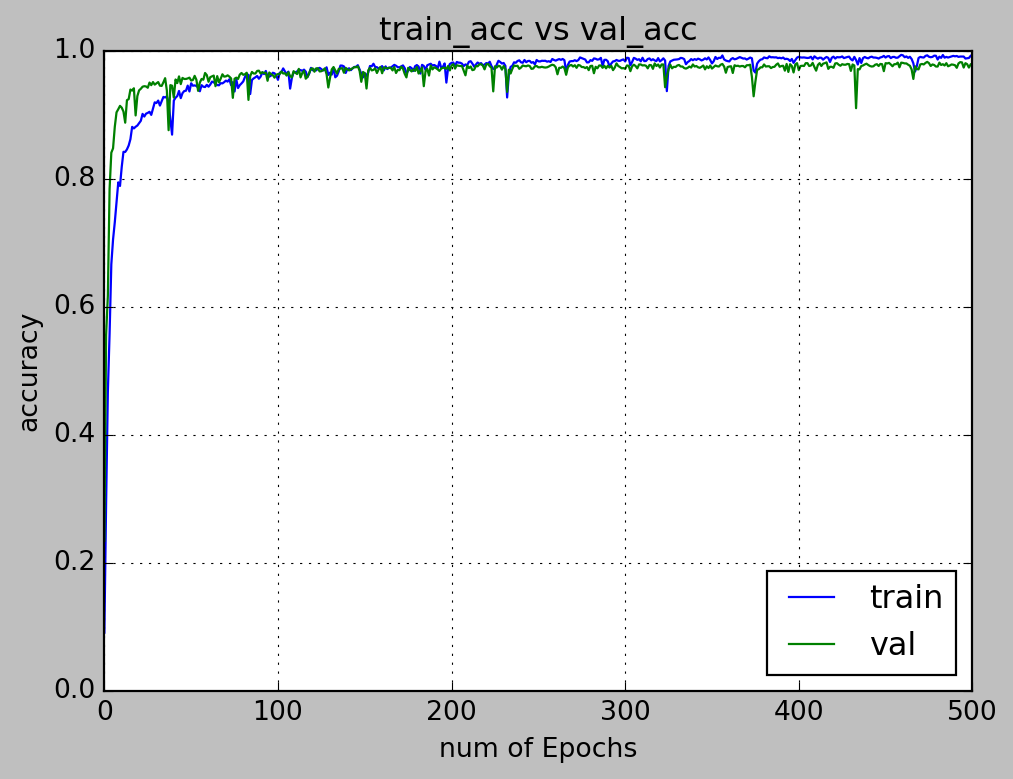

In [12]:
num_epoch = 500
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('dropall_trainloss.jpeg')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('dropall_acc.jpeg')

### 5.2 Model Evaluation
Our objective is to predict a class of grocery from its google images. We would thus, in the google images for model evaluation.  

We chose the model weights at epoch 192 as it is the best balance between loss and accuracy (i.e, the model is not overfitted to the training dataset).

In [46]:
# Loading model weights for best epoch , epoch = 192

from keras.models import load_model
loaded_model = load_model('./dropall weights/Best-weights-my_model-202-0.0525-0.9820.hdf5')

In [47]:
# loading in google images for evaluation

with open('X_conf', 'rb') as file:
    X_conf = pickle.load(file)
    
with open('y_conf', 'rb') as file:
    y_conf = pickle.load(file)
    
Y_conf = np_utils.to_categorical(y_conf, num_classes=17)
del y_conf

In [48]:
# Evaluating the model

score = loaded_model.evaluate(X_conf, Y_conf, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 5.42941787631
Test accuracy: 0.581395352303


### 5.3 Prediction for single image

In [49]:
test_image = X_conf[55:56]
print (test_image.shape)

print(loaded_model.predict(test_image))
print(loaded_model.predict_classes(test_image))
print(Y_conf[55:56])

(1, 128, 128, 3)
[[  0.00e+00   2.26e-12   2.50e-20   9.61e-01   4.46e-17   0.00e+00
    3.50e-28   1.05e-15   1.96e-36   3.85e-02   1.80e-22   2.12e-25
    2.97e-19   5.31e-26   1.98e-16   2.39e-16   3.10e-32]]
[3]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### 5.4 Classification report

In [57]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = loaded_model.predict(X_conf)
print(Y_pred)
y_pred = np.argmax(Y_conf, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)

[[  1.00e+00   1.81e-19   3.54e-06 ...,   2.82e-36   7.48e-12   7.99e-13]
 [  5.48e-24   1.85e-24   2.31e-13 ...,   1.54e-27   9.62e-31   7.61e-11]
 [  1.00e+00   0.00e+00   0.00e+00 ...,   0.00e+00   0.00e+00   0.00e+00]
 ..., 
 [  0.00e+00   0.00e+00   0.00e+00 ...,   0.00e+00   0.00e+00   0.00e+00]
 [  0.00e+00   3.38e-26   3.71e-15 ...,   9.56e-27   3.87e-22   3.74e-26]
 [  0.00e+00   4.70e-35   1.37e-21 ...,   2.95e-30   8.12e-14   2.33e-27]]
[ 0  0  0  0  0  1  1  1  1  1  1 10 10 10 10 10 11 11 11 11 11 12 12 12 12
 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16  2  2  2  2
  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5  5  6  6  7  7  7  7  7
  7  8  8  8  8  8  9  9  9  9  9]


In [60]:
np.argmax(Y_conf,axis=1)

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9])

In [58]:
target_names = ['Wigglys',
'Big red',
'Hersheys' ,
'Twix',
'Snickers',
'Tic tac',
'Dentyne ice',
'Starburst',
'Rockstar',
'Crunch',
'Lays chips',
'Milano biscuits',
'Starbucks',
'Obertos',
'Cheerios',
'Tostitos',
'Ruffles']

print(classification_report(np.argmax(Y_conf,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_conf,axis=1), y_pred))

                 precision    recall  f1-score   support

        Wigglys       1.00      1.00      1.00         5
        Big red       1.00      1.00      1.00         6
       Hersheys       1.00      1.00      1.00         7
           Twix       1.00      1.00      1.00         5
       Snickers       1.00      1.00      1.00         5
        Tic tac       1.00      1.00      1.00         5
    Dentyne ice       1.00      1.00      1.00         2
      Starburst       1.00      1.00      1.00         6
       Rockstar       1.00      1.00      1.00         5
         Crunch       1.00      1.00      1.00         5
     Lays chips       1.00      1.00      1.00         5
Milano biscuits       1.00      1.00      1.00         5
      Starbucks       1.00      1.00      1.00         5
        Obertos       1.00      1.00      1.00         5
       Cheerios       1.00      1.00      1.00         5
       Tostitos       1.00      1.00      1.00         5
        Ruffles       1.00    

### 5.5 Confusion matrix

In [61]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf_mat.jpg')

In [62]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(Y_conf,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


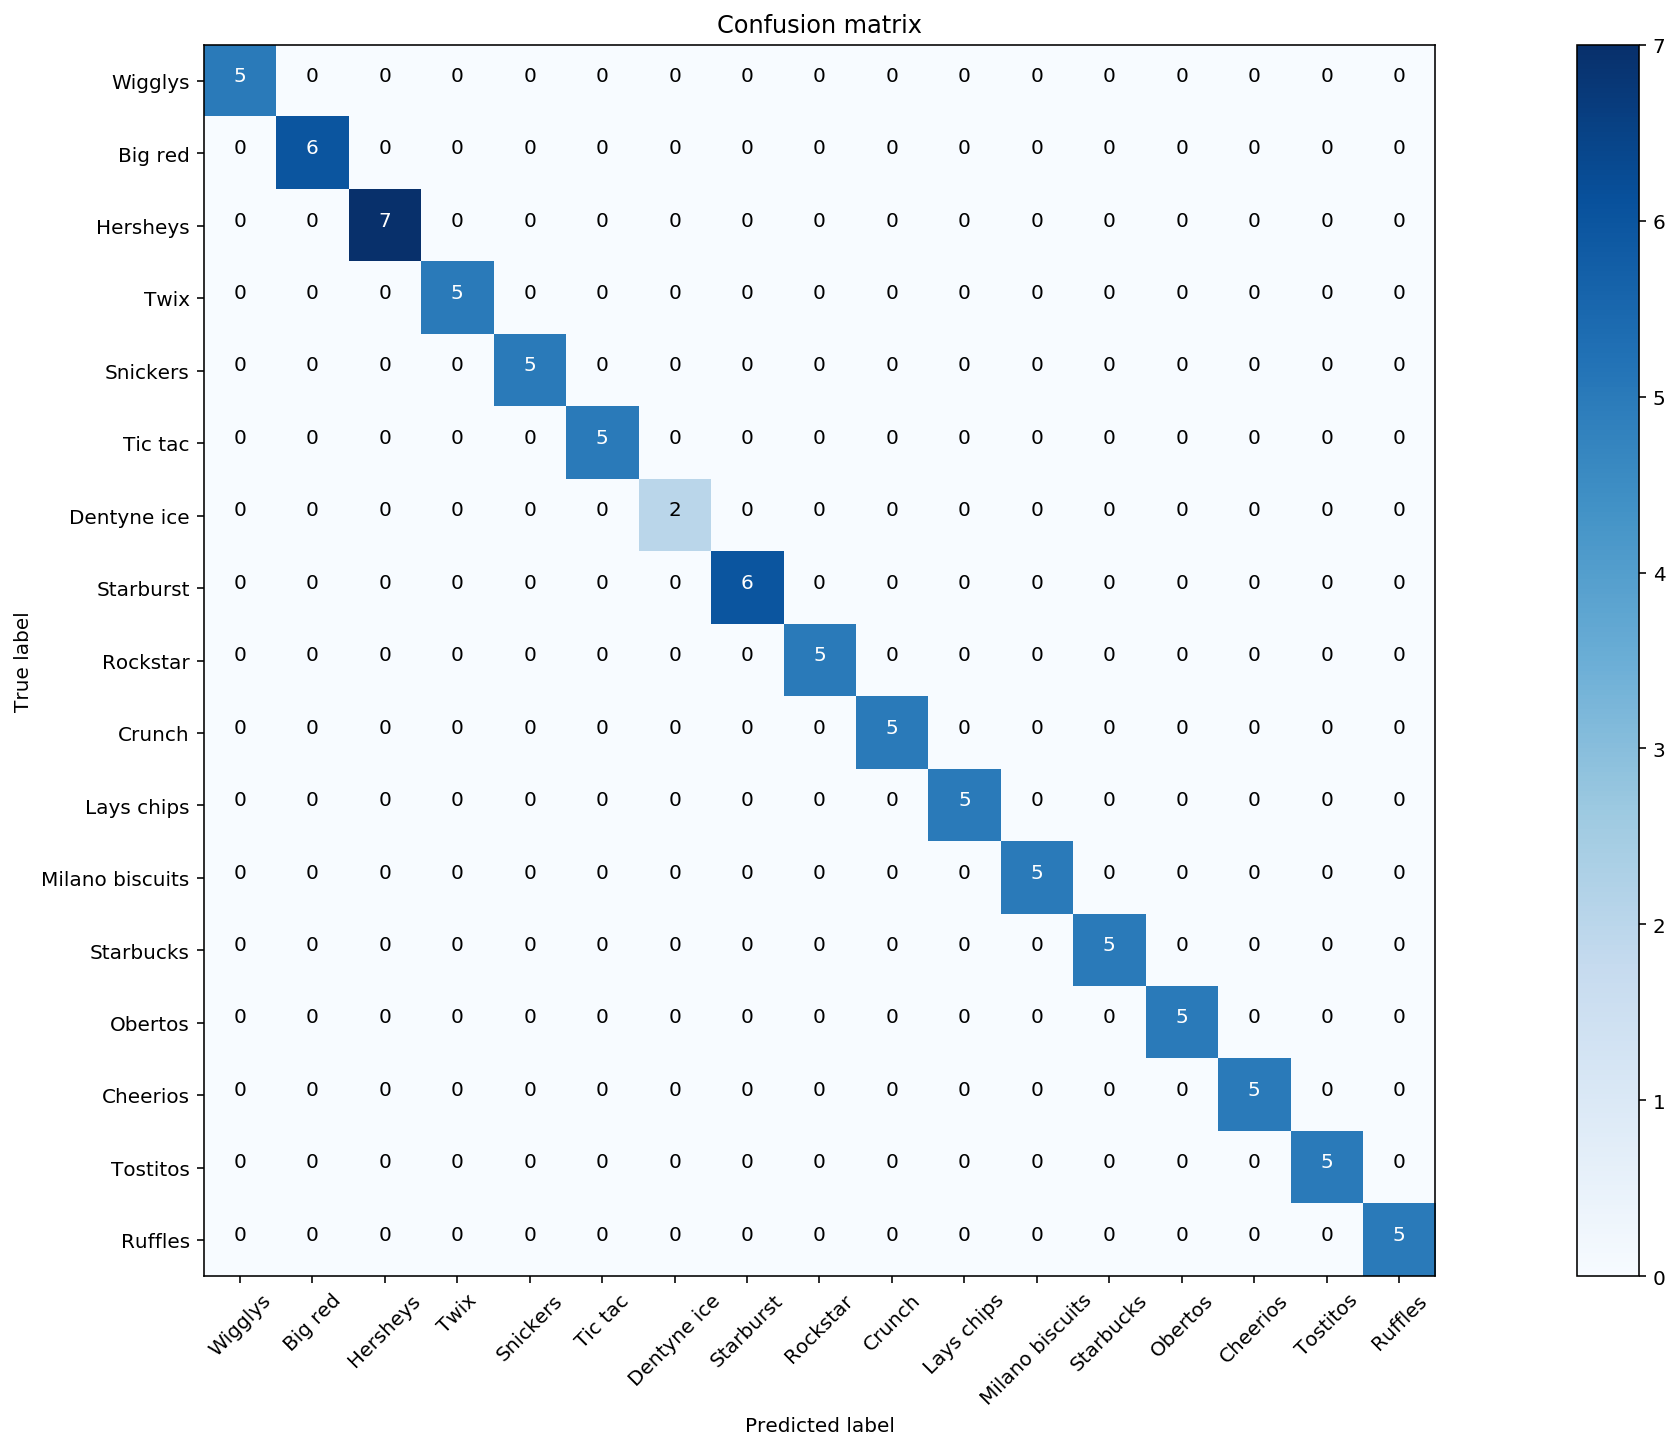

In [63]:
plt.figure(figsize=(20,10))
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.figure()

# Plot normalized confusion matrix
# plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
# plt.figure()
# plt.show()

In [64]:
# loading in google images for evaluation

with open('trfconf', 'rb') as file:
    y_pred = pickle.load(file)
    
with open('conftrue', 'rb') as file:
    y_true = pickle.load(file)


In [65]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf_mat_tf.jpg')

In [66]:
# Compute confusion matrix

from sklearn.metrics import classification_report,confusion_matrix
import itertools

cnf_matrix = (confusion_matrix(y_true, y_pred))

np.set_printoptions(precision=2)

plt.figure()

Confusion matrix, without normalization
[[0 0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 3 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 2 0 2 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 2 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 2 1 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 4]]


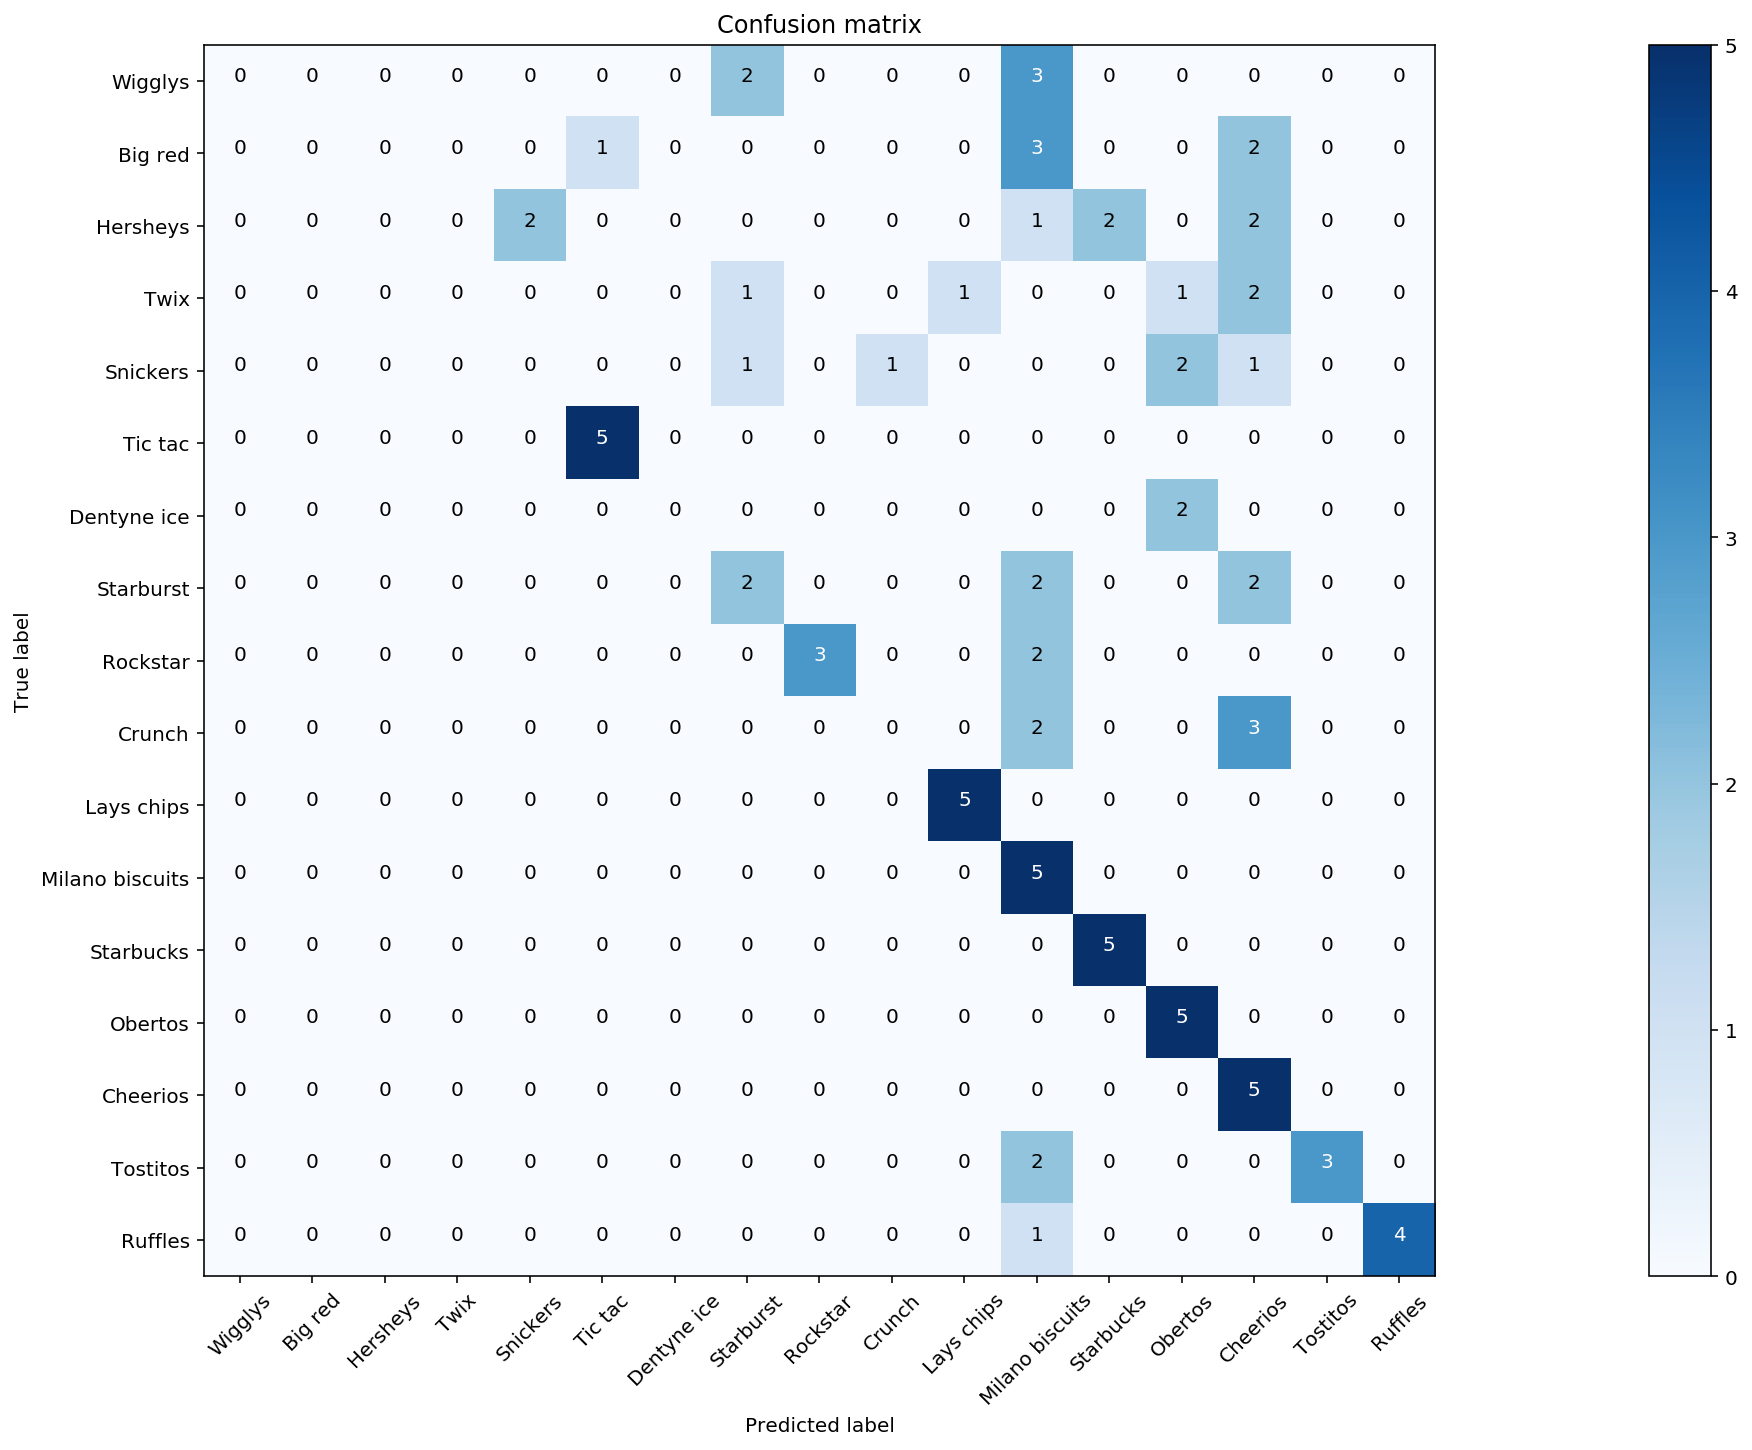

In [67]:
plt.figure(figsize=(30,10))


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.figure()

In [68]:
print(classification_report(y_true, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

        Wigglys       0.00      0.00      0.00         5
        Big red       0.00      0.00      0.00         6
       Hersheys       0.00      0.00      0.00         7
           Twix       0.00      0.00      0.00         5
       Snickers       0.00      0.00      0.00         5
        Tic tac       0.83      1.00      0.91         5
    Dentyne ice       0.00      0.00      0.00         2
      Starburst       0.33      0.33      0.33         6
       Rockstar       1.00      0.60      0.75         5
         Crunch       0.00      0.00      0.00         5
     Lays chips       0.83      1.00      0.91         5
Milano biscuits       0.24      1.00      0.38         5
      Starbucks       0.71      1.00      0.83         5
        Obertos       0.50      1.00      0.67         5
       Cheerios       0.29      1.00      0.45         5
       Tostitos       1.00      0.60      0.75         5
        Ruffles       1.00    

/home/Jeryl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
